In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
import scipy


## 1) Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
## A sample of 40 sales from office  #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- Load the mpg dataset and use it to answer the following questions:

### a) Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
### b) Are compact cars more fuel-efficient than the average car?
### c) Do manual cars get better gas mileage than automatic cars?

In [2]:
#sample 1
mean1 = 45
sdev1 = 1.9
ssize1 = 1115

#sample 2
mean2 = 49
sdev2= 1.9
ssize2 = 1005

alpha = 0.05
# H_0 : avereage time to sell 1 == average time to sell at office 2

# H-a :average time to sell 2 != average tome t sell at office 2 

In [3]:
x= np.arange(50, 150)
y1= stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)


In [4]:
t, p = scipy.stats.ttest_ind_from_stats(mean1, sdev1, ssize1,mean2,sdev2,ssize2, equal_var=True)

In [5]:
t

-48.40151153554419

In [6]:
p

0.0

In [7]:
alpha = 0.5
ssize1 = 40
mean1 = 90
sdev1 = 15

ssize2 = 50 
sdev2 = 20 
mean2 = 100


In [8]:
t, p = scipy.stats.ttest_ind_from_stats(mean1, sdev1, ssize1,mean2,sdev2,ssize2, equal_var=True)

In [9]:
p

0.01020985244923939

In [10]:
t

-2.6252287036468456

In [11]:
mpg = data('mpg')

In [12]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999? NO

In [13]:
c_2008 = mpg[mpg.year == 2008].hwy
c_1999 = mpg[mpg.year == 1999].hwy

<AxesSubplot:>

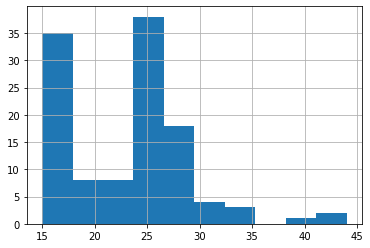

In [14]:
c_1999.hist()

<AxesSubplot:>

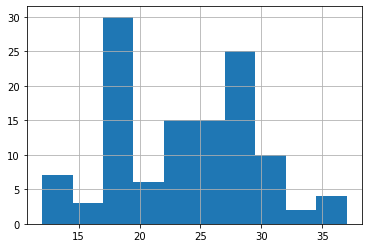

In [15]:
c_2008.hist()

In [16]:
c_2008_cty = mpg[mpg.year == 2008].cty
c_1999_cty = mpg[mpg.year == 1999].cty

<AxesSubplot:>

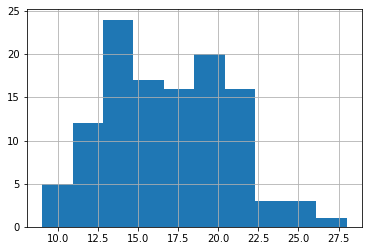

In [17]:
c_2008_cty.hist()

<AxesSubplot:>

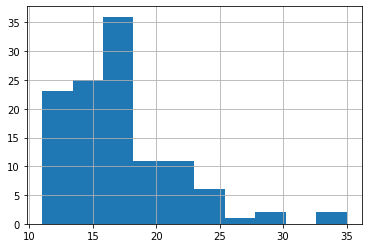

In [18]:
c_1999_cty.hist()

In [19]:
c_2008_cty.var(), c_1999_cty.var()

(16.452844090775127, 19.879015620394938)

In [20]:
c_2008.var(), c_1999.var()

(34.19820218096073, 37.02269378131447)

In [21]:
stats.levene(c_1999,c_2008)

LeveneResult(statistic=0.0212016152523693, pvalue=0.8843574825616618)

In [22]:
t, p = stats.ttest_ind(c_1999,c_2008)
t, p

(-0.03286431672888292, 0.9738110448529322)

In [23]:
mpg['avg_fe']=stats.hmean(mpg[['cty','hwy']],axis=1)

run it as a combined avrg/mean next time with cty and hwy together

### Are compact cars more fuel-efficient than the average car?
- h0 : mpg for compact car <= mpg for the average car
- ha: mpg for compact cars > mpg for the average

In [24]:
compact_cars_cty = mpg[mpg['class'] == 'compact'].avg_fe
compact_cars_cty.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 1      22.212766
2      24.360000
3      24.313725
4      24.705882
5      19.809524
6      21.272727
7      21.600000
8      21.272727
9      19.512195
10     23.333333
11     22.304348
12     18.750000
13     20.238095
14     20.238095
15     18.750000
142    24.360000
143    22.304348
170    22.222222
171    22.978723
172    21.590909
173    22.978723
187    23.625000
188    24.360000
189    25.038462
190    25.735849
191    21.272727
192    21.272727
193    21.600000
194    26.666667
195    27.789474
196    29.836066
197    31.876923
198    29.836066
208    24.360000
209    21.955556
210    24.360000
211    25.019608
212    19.902439
213    37.714286
214    24.360000
215    21.955556
216    25.019608
217    24.360000
218    24.360000
219    24.360000
220    18.871795
221    19.902439
Name: avg_fe, dtype: float64>

<AxesSubplot:>

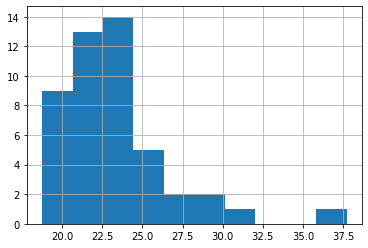

In [25]:
compact_cars_cty.hist()

In [26]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
pop_mean = mpg.avg_fe.mean()

In [27]:
pop_mean

19.585525317633177

In [28]:
fe_compact.mean()

23.500416808701296

In [29]:
t, p = stats.ttest_1samp(compact_cars_cty, pop_mean)
t,p

(7.512360093161354, 1.5617666348807727e-09)

In [30]:
if (p/2 < alpha) and t >0:
    print('reject null')

reject null


### Do manual cars get better gas mileage than automatic cars?

In [31]:
mpg['transmission'] = mpg.trans.str[:-4]
mpg.trans = mpg.trans.str[:-4]

In [32]:
mpg.trans.value_counts()

auto      157
manual     77
Name: trans, dtype: int64

In [33]:
fe_auto = mpg[mpg['trans'] == 'auto'].avg_fe
fe_manual = mpg[mpg['trans'] =='manual'].avg_fe

<AxesSubplot:>

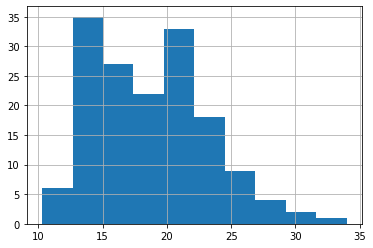

In [34]:
fe_auto.hist()

<AxesSubplot:>

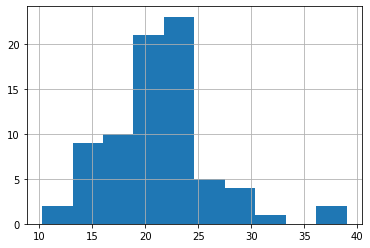

In [35]:
fe_manual.hist()

In [36]:
fe_auto.var(),fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [37]:
stats.levene(fe_auto,fe_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [38]:
fe_auto.mean()

18.583199507835747

In [39]:
fe_manual.mean()

21.629228592155194

In [40]:
t, p = stats.ttest_ind(fe_auto, fe_auto, equal_var = True)
t,p

(0.0, 1.0)

# Correlation

#### Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?


In [41]:
from env import get_db_url
import pandas as pd
import numpy as np

In [42]:
## sql = """select * from customers
## join internet_service_types using(internet_service_type_id)"""

In [43]:
# url = get_db_url("telco_churn")
# telco = pd.read_sql(sql, url)
# telco.head()

In [44]:
df = pd.read_csv("Copy of eriberto contreras - jemison_spreadsheet_exercises - Copy of Table1_CustDetails.csv")

In [45]:
df.dropna(inplace=True)
# gets rid of nulls !!!
# other way to get rid of nulls via teacher way - df.total charges = df.total_charges.replace('', np.nan).astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7037 entries, 0 to 7048
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7037 non-null   object 
 1   gender                  7037 non-null   object 
 2   is_senior_citizen       7037 non-null   int64  
 3   partner                 7037 non-null   object 
 4   dependents              7037 non-null   object 
 5   phone_service           7037 non-null   int64  
 6   internet_service        7037 non-null   int64  
 7   contract_type           7037 non-null   int64  
 8   payment_type            7037 non-null   object 
 9   monthly_charges         7037 non-null   float64
 10  total_charges           7037 non-null   float64
 11  churn                   7037 non-null   object 
 12  tenure                  7037 non-null   float64
 13  is_female               7037 non-null   bool   
 14  has_churn               7037 non-null   

In [47]:
r,p = stats.pearsonr(df.tenure, df.monthly_charges)
r, p

(0.24614269648793144, 1.2893808570158242e-97)

In [48]:
a = 0.05 
x = df.tenure
y = df.monthly_charges
r, p = stats.pearsonr(x, y)

In [49]:
print('r =', r)
print('p =', p)

r = 0.24614269648793144
p = 1.2893808570158242e-97


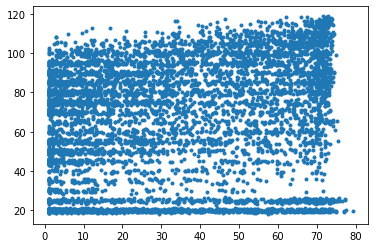

In [50]:
plt.scatter(x, y, marker='.')

### Total charges?

In [51]:
alpha = 0.5

In [52]:
r,p = stats.pearsonr(df.tenure, df.monthly_charges)
r, p

(0.24614269648793144, 1.2893808570158242e-97)

In [53]:
if p < alpha:
   print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


In [54]:
stats.pearsonr(df.tenure, df.total_charges)

(0.8258030620541383, 0.0)

### What happens if you control for phone and internet service?

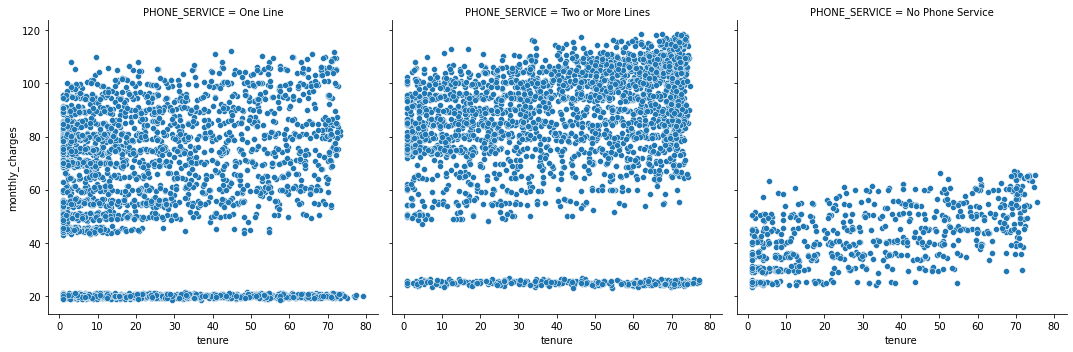

In [55]:
sns.relplot(data=df, y='monthly_charges', x='tenure', col='PHONE_SERVICE')

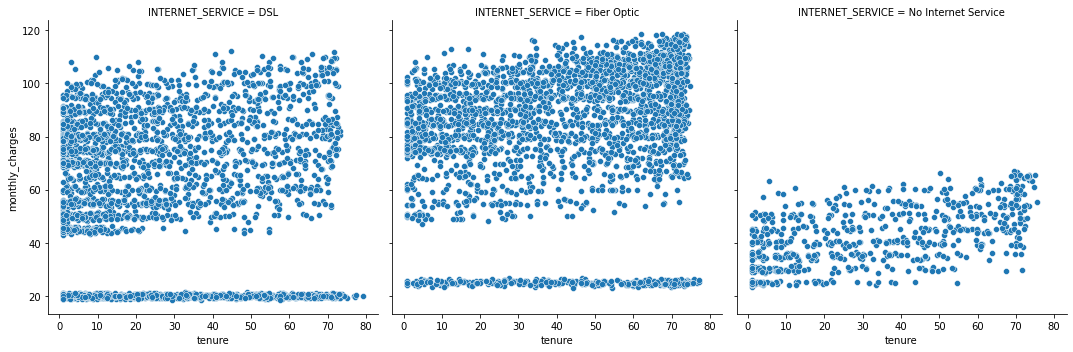

In [56]:
sns.relplot(data=df, y='monthly_charges', x='tenure', col='INTERNET_SERVICE')

In [57]:
dsl_int = df[df.INTERNET_SERVICE == 'DSL']
fiber_int = df[df.INTERNET_SERVICE == 'Fiber Optic']
no_int = df[df.INTERNET_SERVICE == 'No Internet Service']

In [58]:

r, p = stats.pearsonr(dsl_int.monthly_charges, dsl_int.tenure)
print('DSL Internet/Monthly Charge')
print('  r =', r)
print('  p =', p)

DSL Internet/Monthly Charge
  r = 0.06170850779677226
  p = 0.0003243924665082648


In [59]:
r, p = stats.pearsonr(fiber_int.monthly_charges, fiber_int.tenure)
print('fiber Internet/Motnhly')
print('  r =', r)
print('  p =', p)


fiber Internet/Motnhly
  r = 0.13512576547636745
  p = 1.4694260690403364e-13


In [60]:
r, p = stats.pearsonr(no_int.monthly_charges, no_int.tenure)
print('No Internet/motnhly')
print('  r =', r)
print('  p =', p)


No Internet/motnhly
  r = 0.5929219670151437
  p = 6.954734519987262e-66


In [61]:
stats.pearsonr(df.tenure,df.total_charges)

(0.8258030620541383, 0.0)

## 2) Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [62]:
query= """
SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e 
JOIN salaries s USING (emp_no)
WHERE s.to_date > now()
"""

In [63]:
url= f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [64]:
employees_with_salaries = pd.read_sql(query,url)
employees_with_salaries

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692
...,...,...
240119,2572,52868
240120,3410,69501
240121,5030,83441
240122,2298,55003


In [65]:
stats.pearsonr(employees_with_salaries.tenure, employees_with_salaries.salary)

(0.3064625613186086, 0.0)

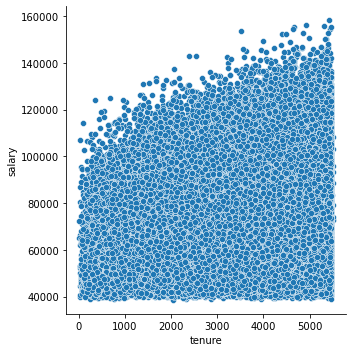

In [66]:
sns.relplot(data = employees_with_salaries, y = 'salary', x = 'tenure')

In [67]:
query = """
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t using (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)
"""

In [68]:
employees_with_titles = pd.read_sql(query, url)
employees_with_titles

,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2
...,...,...,...
300019,499995,2572,1
300020,499996,3410,2
300021,499997,5030,2
300022,499998,2298,2


In [69]:
employees_with_titles.head()

,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2


In [70]:
stats.pearsonr(employees_with_titles.tenure, employees_with_titles.n_titles)


(0.2665989299136399, 0.0)

In [71]:
alpha = 0.05
if p < alpha:
    print("reject the null")
else:
    print("fail to reject the null")

reject the null


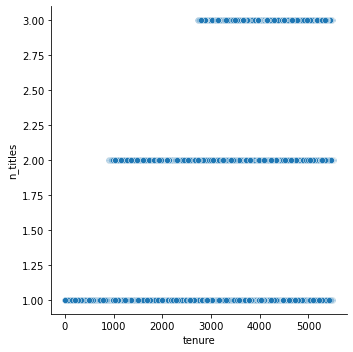

In [72]:
sns.relplot(data = employees_with_titles, y = 'n_titles', x = 'tenure')

In [73]:
import pydataset
sleep = pydataset.data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [74]:
sleep = pydataset.data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [75]:
stats.pearsonr(sleep.Reaction, sleep.Days) #null is rejected 

(0.5352302262650253, 9.894096322214812e-15)

In [76]:
alpha = 0.05
if p < alpha:
    print("reject the null")
else:
    print("fail to reject the null")

reject the null


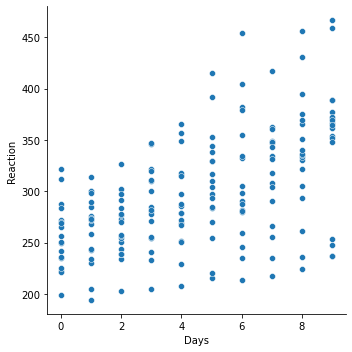

In [77]:
sns.relplot(data=sleep, y = 'Reaction', x = 'Days')

## Chi Testing 

### 1) Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [78]:
#BUILDING a chart

columns = ['Codeup_Student','Not_Codeup_Student']
index = ['Uses_a_Macbook', 'Doesnt_Use_A_Macbook']
df = pd.DataFrame([[49,20],[1,30]], index= index, columns= columns)
df
# df = observed

,Codeup_Student,Not_Codeup_Student
Uses_a_Macbook,49,20
Doesnt_Use_A_Macbook,1,30


In [79]:
# null hypothesis is that they independent from each other 

In [80]:
alpha = 0.5
chi2, p, degf, expected = stats.chi2_contingency(df)
p

1.4116760526193828e-09

In [81]:
if p < alpha:
    print("reject the null")
else:
    print("fail to reject the null")

reject the null


## 2) Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

- null hypothesis: cty mileage and hwy milage are independent.

In [82]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  avg_fe        234 non-null    float64
 12  transmission  234 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 25.6+ KB


In [83]:
observed = pd.crosstab(mpg.cyl, mpg.model)
observed

model,4runner 4wd,a4,a4 quattro,a6 quattro,altima,c1500 suburban 2wd,camry,camry solara,caravan 2wd,civic,...,mustang,navigator 2wd,new beetle,passat,pathfinder 4wd,ram 1500 pickup 4wd,range rover,sonata,tiburon,toyota tacoma 4wd
cyl,,,,,,,,,,,,,,,,,,,,,
4,2,4,4,0,4,0,4,4,1,9,...,0,0,4,4,0,0,0,4,4,3
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
6,3,3,4,2,2,0,3,3,10,0,...,4,0,0,3,3,0,0,3,3,4
8,1,0,0,1,0,5,0,0,0,0,...,5,3,0,0,1,10,4,0,0,0


In [84]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

9.16652463540342e-22

In [85]:
alpha = 0.05

In [86]:
if p < alpha:
    print("reject the null")
else:
    print("fail to reject the null")

reject the null


### 3) Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

In [87]:
# null hypothesis: gender/sales/marketing are independent of eachother.

In [88]:
sql = """SELECT first_name, last_name, dept_name, gender
FROM dept_emp
JOIN employees using(emp_no)
JOIN departments using (dept_no)
WHERE to_date > NOW() AND dept_name = 'Sales' OR dept_name = 'Marketing';"""
url = get_db_url ("employees")
employees = pd.read_sql(sql, url)
employees = pd.DataFrame(employees)
employees

,first_name,last_name,dept_name,gender
0,Cristinel,Bouloucos,Marketing,F
1,Georgy,Dredge,Marketing,M
2,Berhard,McFarlin,Marketing,M
3,Lunjin,Giveon,Marketing,M
4,Yucel,Auria,Marketing,F
...,...,...,...,...
57907,Mihalis,Crabtree,Sales,F
57908,Guozhong,Felder,Sales,M
57909,Gino,Usery,Sales,M
57910,Nathan,Ranta,Sales,F


In [89]:
observe = pd.crosstab(employees.gender, employees.dept_name)
observe

dept_name,Marketing,Sales
gender,,
F,8037,14999
M,12174,22702


In [90]:
chi2, p, degf, expected = stats.chi2_contingency(observe)
p

0.9723000856728293

In [91]:
alpha = 0.05
if p < alpha:
    print("reject the null")
else:
    print("fail to reject the null")

fail to reject the null


In [92]:
sql = """SELECT gender, dept_no
FROM employees
LEFT JOIN dept_manager as dm USING (emp_no);
"""
df=pd.read_sql(sql,url)
df.head()

,gender,dept_no
0,M,None
1,F,None
2,M,None
3,M,None
4,M,None


In [93]:
df['manager'] = ~df.dept_no.isnull() # ~ means is not 

pd.crosstab(df.manager, df.gender)

gender,F,M
manager,,
False,120038,179962
True,13,11


In [94]:
observe = pd.crosstab(df.manager, df.gender)
observe

gender,F,M
manager,,
False,120038,179962
True,13,11


In [95]:
chi2, p, degf, expected = stats.chi2_contingency(observe)
p

0.22745818732810363

In [96]:
alpha = 0.05
if p < alpha:
    print("reject the null")
else:
    print("fail to reject the null")

fail to reject the null
